# New camera data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('New camera image data - Sheet1.csv')
print(df.loc[0][0:13], df.loc[0][16:24], df.loc[0][27:35])
data = df.values
# print(data)

Image number           1.0000
Electron Energy       50.5000
Opening                0.9870
H_Length               0.6710
H_Area                 6.5460
H_Height_1            90.3040
H_Xpeak_1              0.0450
H_Half max left_1      0.0398
H_Half max right_1     0.0546
H_Height_2            80.5200
H_Xpeak_2              0.6240
H_Half max left_2      0.6170
H_Half max right_2     0.6320
Name: 0, dtype: float64 V_Height_1             91.5720
V_Xpeak_1               0.0511
V_Half max left_1       0.0398
V_Half max right_1      0.0615
V_Height_2            119.0640
V_Xpeak_2               0.6230
V_Half max left_2       0.6120
V_Half max right_2      0.6340
Name: 0, dtype: float64 D_Height_1             93.8770
D_Xpeak_1               0.0414
D_Half max left_1       0.0334
D_Half max right_1      0.0495
D_Height_2            108.4680
D_Xpeak_2               0.8560
D_Half max left_2       0.8480
D_Half max right_2      0.8670
Name: 0, dtype: float64


In [2]:
### Constants ###
N = 16   # number of images
H_V_lattice = 3.493569812
D_lattice = 2.470326905

In [34]:
### Data Values ###
electron_energy = data[:,1]
sqrt_E = np.sqrt(electron_energy)

opening_AU = data[:,2]
opening_AU_best = np.mean(opening_AU)
error_opening_AU = np.std(opening_AU)/opening_AU
# print(error_opening_AU)

H_data = data[:,5:13]
# print(H_data[0,:], '||')
V_data = data[:,16:24]
# print(V_data[:,3], '||')
D_data = data[:,27:]
# print(D_data[0,:], '||')
##need to fix first couple data points of diagonal data (divide spacing by 2 for first 4 measurements)
###fixed in next cell

In [4]:
D_data[:5,1] = .5*D_data[:5,1]
D_data[:5,5] = .5*D_data[:5,5]
# print(D_data[:6,5]-D_data[:6,1])

In [5]:
### Calculated Values ###
#Opening and opening error
def recip_openingANDerror(lattice, data, Opening_A, Error_opening_AU):
  spacing_AU = data[:,5] - data[:,1]
  opening = lattice*(Opening_A/spacing_AU)
  d_left = .5*(data[:,3] - data[:,2])
  d_right = .5*(data[:,7] - data[:,6])
  d_spacing = np.sqrt(np.square(d_left) + np.square(d_right))
  frac_error = np.sqrt(np.square(d_spacing/spacing_AU) + np.square(Error_opening_AU/Opening_A))
  error_recip = frac_error*opening
  return opening, error_recip

#least squares fit with error in slope and intercept
def w_lst_sq(opening_recip, error_recip, e_energy, sqrt_e):
  weights = 1/np.square(error_recip)
  Delta = np.sum(weights)*np.sum(weights*e_energy)-np.square(np.sum(weights*sqrt_e))
  intercept = ((np.sum(weights*e_energy)*np.sum(weights*opening_recip))
               -(np.sum(weights*sqrt_e)*np.sum(weights*sqrt_e*opening_recip)))/Delta
  slope = (np.sum(weights)*np.sum(weights*sqrt_e*opening_recip)-np.sum(weights*sqrt_e)*np.sum(weights*opening_recip))/Delta
  intercept_error = np.sqrt(np.sum(weights*e_energy)/Delta)
  slope_error = np.sqrt(np.sum(weights)/Delta)
  return slope, slope_error, intercept, intercept_error

In [30]:
# print(recip_openingANDerror(H_V_lattice, H_data, opening_AU, error_opening_AU))

In [7]:
H_recip_opening, H_opening_error = recip_openingANDerror(H_V_lattice, H_data, opening_AU, error_opening_AU)
print('H Slope + error, Intercept + error:', w_lst_sq(H_recip_opening, H_opening_error, electron_energy, sqrt_E))

V_recip_opening, V_opening_error = recip_openingANDerror(H_V_lattice, V_data, opening_AU, error_opening_AU)
print('V Slope + error, Intercept + error:', w_lst_sq(V_recip_opening, V_opening_error, electron_energy, sqrt_E))

D_recip_opening, D_opening_error = recip_openingANDerror(D_lattice, D_data, opening_AU, error_opening_AU)
print('D Slope + error, Intercept + error:', w_lst_sq(D_recip_opening, D_opening_error, electron_energy, sqrt_E))

H Slope + error, Intercept + error: (0.7707384404775303, 0.032738373721392336, 0.507881158392666, 0.29181443985253985)
V Slope + error, Intercept + error: (0.7635937144289188, 0.046189895975685805, 0.6470749251271875, 0.4196262338284149)
D Slope + error, Intercept + error: (0.7781788677967666, 0.05421326366739712, 0.4939931209205846, 0.4801376271888745)


In [24]:
H1_slope, H1_slope_error, H1_intercept, H1_intercept_error = w_lst_sq(H_recip_opening, H_opening_error, electron_energy, sqrt_E)
V1_slope, V1_slope_error, V1_intercept, V1_intercept_error = w_lst_sq(V_recip_opening, V_opening_error, electron_energy, sqrt_E)


# Old camera data

In [8]:
df2 = pd.read_csv('Old Camera image data - Sheet1.csv')
# print(df.loc[0][5:13], df.loc[0][16:24], df.loc[0][27:35])
data2 = df2.values

In [35]:
### Data Values ###
N2 = 9
electron_energy2 = data2[:,1]
sqrt_E2 = np.sqrt(electron_energy2)

opening_AU2 = data2[:,2]
opening_AU_best2 = np.mean(opening_AU2)
error_opening_AU2 = np.std(opening_AU2)/opening_AU2
# print(error_opening_AU)

H_data2 = data2[:,5:13]
# print(H_data[0,:], '||')
V_data2 = data2[:,16:24]
# print(V_data[:,3], '||')
D_data2 = data2[:,27:]
# print(D_data[0,:], '||')

In [22]:
print(H_data2[:,5]-H_data2[:,1])
print(opening_AU2)

[0.5063 0.4939 0.4762 0.4514 0.4316 0.3839 0.3528 0.3488 0.3421]
[0.925 0.938 0.926 0.927 0.937 0.865 0.863 0.864 0.867]


In [23]:
# print(recip_openingANDerror(H_V_lattice, H_data2, opening_AU2, error_opening_AU2))
H_recip_opening2, H_opening_error2 = recip_openingANDerror(H_V_lattice, H_data2, opening_AU2, error_opening_AU2)
print('H Slope + error, Intercept + error:', w_lst_sq(H_recip_opening2, H_opening_error2, electron_energy2, sqrt_E2))

V_recip_opening2, V_opening_error2 = recip_openingANDerror(H_V_lattice, V_data2, opening_AU2, error_opening_AU2)
print('V Slope + error, Intercept + error:', w_lst_sq(V_recip_opening2, V_opening_error2, electron_energy2, sqrt_E2))

# D_recip_opening2, D_opening_error2 = recip_openingANDerror(D_lattice, D_data2, opening_AU2, error_opening_AU2)
# print('D Slope + error, Intercept + error:', w_lst_sq(D_recip_opening2, D_opening_error2, electron_energy2, sqrt_E2))

H Slope + error, Intercept + error: (0.7356853298640228, 0.06504787657222415, 0.4607418125825584, 0.6075423644256985)
V Slope + error, Intercept + error: (0.74456186531652, 0.07632082044925977, 0.4286790187063302, 0.7172379276254112)


In [29]:
H2_slope, H2_slope_error, H2_intercept, H2_intercept_error = w_lst_sq(H_recip_opening2, H_opening_error2, electron_energy2, sqrt_E2)
V2_slope, V2_slope_error, V2_intercept, V2_intercept_error = w_lst_sq(V_recip_opening2, V_opening_error2, electron_energy2, sqrt_E2)

## Error calculations

In [37]:
def spacing_AU(data):
    meas_spacing = data[:,5] - data[:,1]
    spacing_frac_error = np.sqrt(np.square(.5*(data[:,3] - data[:,2])) + np.square(.5*(data[:,6] - data[:,5])))/meas_spacing
    return meas_spacing, spacing_frac_error

def frac_error(frac_ab, frac_open, frac_space):
    tot_frac_error = np.sqrt(np.square(frac_ab) + np.square(frac_open) + np.square(frac_space))
    return tot_frac_error

def frac_axb(A, d_A, B, d_B, sqrt_e):
    frac = np.sqrt(np.square(sqrt_e*d_A) + np.square(d_B))/(A*sqrt_e + B)
    return frac

def spacing_calc(energy, meas_opening, data):
    meas_spacing = data[:,5] - data[:,1]
#     d_left = .5*(data[:,3] - data[:,2])
#     d_right = .5*(data[:,6] - data[:,5])
#     d_spacing = np.sqrt(np.square(d_left) + np.square(d_right))
    ratio = meas_spacing/meas_opening
    direction = str(input('Which direction? H/V/D (case sensitive)'))
    if direction == 'H':
        opening_func = 0.7707384404775303*np.sqrt(energy) + 0.507881158392666
    elif direction == 'V':
        opening_func = 0.7635937144289188*np.sqrt(energy) + 0.6470749251271875
    else:
        opening_func = 0.7781788677967666*np.sqrt(energy) + 0.4939931209205846
    
    spacing = ratio*opening_func
    return spacing

In [43]:
H_spacing = spacing_calc(electron_energy, opening_AU, H_data)
H2_spacing = spacing_calc(electron_energy2, opening_AU2, H_data2)

Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H


In [44]:
V_spacing = spacing_calc(electron_energy, opening_AU, V_data)
V2_spacing = spacing_calc(electron_energy2, opening_AU2, V_data2)

Which direction? H/V/D (case sensitive)V
Which direction? H/V/D (case sensitive)V


In [41]:
H_frac_axb = frac_axb(H1_slope, H1_slope_error, H1_intercept, H1_intercept_error, sqrt_E)
H_spacing_meas, H_frac_spacing = spacing_AU(H_data)
H_frac_error = frac_error(H_frac_axb, error_opening_AU, H_frac_spacing)
H_error = H_frac_error*H_spacing

In [42]:
V_frac_axb = frac_axb(V1_slope, V1_slope_error, V1_intercept, V1_intercept_error, sqrt_E)
V_spacing_meas, V_frac_spacing = spacing_AU(V_data)
V_frac_error = frac_error(V_frac_axb, error_opening_AU, V_frac_spacing)
V_error = V_frac_error*V_spacing

In [47]:
H2_frac_axb = frac_axb(H2_slope, H2_slope_error, H2_intercept, H2_intercept_error, sqrt_E2)
H2_spacing_meas, H2_frac_spacing = spacing_AU(H_data2)
H2_frac_error = frac_error(H2_frac_axb, error_opening_AU2, H2_frac_spacing)
H2_error = H2_frac_error*H2_spacing

V2_frac_axb = frac_axb(V2_slope, V2_slope_error, V2_intercept, V2_intercept_error, sqrt_E2)
V2_spacing_meas, V2_frac_spacing = spacing_AU(V_data2)
V2_frac_error = frac_error(V2_frac_axb, error_opening_AU2, V2_frac_spacing)
V2_error = V2_frac_error*V2_spacing

## Fit comparison

In [28]:
print(H1_slope - H2_slope, H1_intercept - H2_intercept)
print(V1_slope - V2_slope, V1_intercept - V2_intercept)

0.035053110613507465 0.04713934581010759
0.019031849112398747 0.21839590642085727


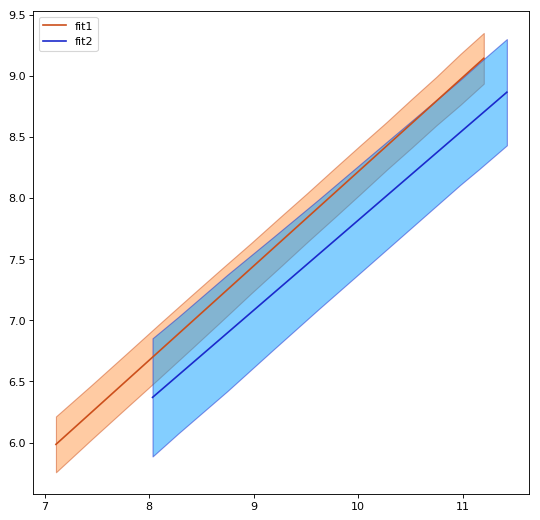

In [71]:
#plot lines on top of each other with shaded uncertainties

x1 = sqrt_E
x2 = sqrt_E2
y1 = H1_slope*x1 + H1_intercept
y2 = H2_slope*x2 + H2_intercept

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x1, y1, 'k', color='#CC4F1B', label = 'fit1')
plt.fill_between(x1, y1-H_error, y1+H_error, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

plt.plot(x2, y2, 'k', color='#1B2ACC', label = 'fit2')
plt.fill_between(x2, y2-H2_error, y2+H2_error, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.legend(loc = 2)